<p style = "font-size : 50px; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

### **DATA UNDERSTANDING** 

### **DATA UNDERSTANDING** 

#### **1.** Proses pengumpulan data
   * Sumber data :  https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
   * Data : Chronic_Kidney_Disease.csv

In [12]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px

In [15]:
data = pd.read_csv ('chronic_kidney_disease_full.csv')
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,?,70,1.015,4,0,abnormal,normal,notpresent,notpresent,104,...,?,?,no,no,no,good,yes,no,ckd,NaN
1,?,70,1.020,0,0,?,?,notpresent,notpresent,219,...,9800,4.4,no,no,no,good,no,no,ckd,NaN
2,55,70,1.010,3,0,?,normal,notpresent,notpresent,99,...,?,?,no,no,no,poor,yes,no,ckd,NaN
3,60,70,1.010,0,0,?,normal,notpresent,notpresent,140,...,?,?,no,no,no,good,no,no,ckd,NaN
4,72,90,1.025,1,3,?,normal,notpresent,notpresent,323,...,?,?,no,yes,yes,poor,no,no,ckd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,NaN
281,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,NaN
282,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,NaN
283,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,...,6800,6.1,no,no,no,good,no,no,notckd,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      284 non-null    object
 1   bp       284 non-null    object
 2   sg       284 non-null    object
 3   al       284 non-null    object
 4   su       284 non-null    object
 5   rbc      284 non-null    object
 6   pc       284 non-null    object
 7   pcc      284 non-null    object
 8   ba       284 non-null    object
 9   bgr      284 non-null    object
 10  bu       284 non-null    object
 11  sc       284 non-null    object
 12  sod      284 non-null    object
 13  pot      284 non-null    object
 14  hemo     284 non-null    object
 15  pcv      284 non-null    object
 16  wbcc     284 non-null    object
 17  rbcc     284 non-null    object
 18  htn      284 non-null    object
 19  dm       283 non-null    object
 20  cad      284 non-null    object
 21  appet    284 non-null    object
 22  pe

In [7]:
#mengecak 5 data pertama

# data.head()

In [4]:
#mengecak 5 data terakhir

#data.tail()

In [5]:
#mengecek record dan atribut data

#data.shape

#### 2. Deskriptif data

Berikut gambaran singkat tentang apa yang mungkin diwakili oleh setiap kolom:
id : Unique identifier for each patient.
age : Age of the patient.
bp : Blood pressure readings.
sg : Specific gravity of urine, indicating kidney function.
al : Albumin levels in urine, another kidney function indicator.
su : Sugar levels in urine, related to diabetes.
rbc : Red blood cell count.
pc : Pus cell count, indicating infection.
pcc : Pus cell clumps, also indicating infection.
ba : Bacteria presence
pcv : Packed cell volume, related to anemia.
wc : White blood cell count, indicating immune response.
rc : Red blood cell count.
htn : Hypertension status.
dm : Diabetes mellitus status.
cad : Coronary artery disease status.
appet : Appetite status.
pe : Presence of pedal edema.
ane : Anemia status.
classification : Final diagnosis or classification of the patient’s condition.

In [6]:
#mengecek tipe atrtibut

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [7]:
print(data.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [8]:
# plt.figure(figsize=(20,10))
# data.boxplot(column=['hemo'])
# #'age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'
# plt.show()

In [9]:
#mengecek korelasi atribut
#data.corr()

In [10]:
#deskriptif statistik
#data.describe()

In [8]:
# mengecek distribusi kelas data
distribusiKelasData = data['class'].value_counts()
distribusiKelasData

ckd       250
notckd    150
Name: class, dtype: int64

In [ ]:
# y = data['Class']
# y.value_counts().plot.pie(autopct='%1.1f%%')

#### 3. Eksplorasi data awal

In [ ]:
# Eksplorasi distribusi kelas
#sns.countplot(data, x="classification")

#### 4. Verifikasi Kualitas Data

In [ ]:
#mengecak missingg value
#data.isnull().sum().sort_values(ascending=False)

In [ ]:
#data.isna().sum().sum()

In [ ]:
#mengecak missingg value
#missing_values = data.isnull().sum().sort_values(ascending=False)
#missing_percentage = (missing_values / len(data)) * 100

# Menampilkan hasil
#print(missing_percentage)

In [ ]:
# Membuat heatmap untuk missing values
#plt.figure(figsize=(8, 6))
#sns.heatmap(data.isnull()) 
#plt.title('Missing Values Heatmap')
#plt.show()

In [ ]:
#data.isnull().sum()


In [ ]:
#mengecak duplikasi data
#data.duplicated().sum()

## **DATA PREPARATION** 

#### 1. Seleksi Data

In [ ]:
#pemilihan data/baris (instance selection)
#data.columns

In [ ]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

In [ ]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# mengganti nama kolom agar lebih mudah digunakan

data.columns = ['Age','Blood Pressure','Specific Gravity','Albumin','Sugar','Red Blood Cells','Pus Cell',
                'Pus Cell Clumps','Bacteria','Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium',
                'Potassium','Haemoglobin','Packed Cell Volume','White Blood Cell Count','Red Blood Cell Count',
                'Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Peda Edema','Anemia','Class']
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
for columns in data:
    print(f" Atribut => {columns} \n {data[columns].unique().tolist()} \n")

 Atribut => Age 
 [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, nan, 73.0, 70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0, 67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0, 71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0, 14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0, 78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0, 22.0, 79.0] 

 Atribut => Blood Pressure 
 [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110.0, 140.0, 180.0, 120.0] 

 Atribut => Specific Gravity 
 [1.02, 1.01, 1.005, 1.015, nan, 1.025] 

 Atribut => Albumin 
 [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0] 

 Atribut => Sugar 
 [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0] 

 Atribut => Red Blood Cells 
 [nan, 'normal', 'abnormal'] 

 Atribut => Pus Cell 
 ['normal', 'abnormal', nan] 

 Atribut => Pus Cell Clumps 
 ['notpresent', 'present', nan] 

 Atribut => Bacteria 
 ['notpresent', 'present', nan] 

 

In [ ]:
# data.info()

In [ ]:
#Seperti yang dapat kita lihat bahwa 'Packed Cell Volume', 'White Blood Cell Count' dan 'Red Blood Cell Count' adalah tipe objek. Kita perlu mengubahnya menjadi tipe numerik.
#mengubah kolom yang diperlukan menjadi tipe numerik

data['Packed Cell Volume'] = pd.to_numeric(data['Packed Cell Volume'], errors='coerce')
data['White Blood Cell Count'] = pd.to_numeric(data['White Blood Cell Count'], errors='coerce')
data['Red Blood Cell Count'] = pd.to_numeric(data['Red Blood Cell Count'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [ ]:
data.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Peda Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
nomCols = [columns for columns in data.columns if data[columns].dtype == 'object']
numCols = [columns for columns in data.columns if data[columns].dtype != 'object']

In [ ]:
#Eksplorasi nilai unik dalam numerik kolom

for columns in numCols:
    print(f" Atribut => {columns} \n {data[columns].unique().tolist()}\n")

 Atribut => Age 
 [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, nan, 73.0, 70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0, 67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0, 71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0, 14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0, 78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0, 22.0, 79.0]

 Atribut => Blood Pressure 
 [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110.0, 140.0, 180.0, 120.0]

 Atribut => Specific Gravity 
 [1.02, 1.01, 1.005, 1.015, nan, 1.025]

 Atribut => Albumin 
 [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]

 Atribut => Sugar 
 [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]

 Atribut => Blood Glucose Random 
 [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0, 410.0, 138.0, 70.0, 490.0, 380.0, 208.0, 98.0, 157.0, 76.0, 99.0, 114.0, 263.0, 173.0, 95.0, 108.0, 156.0, 264.0, 123.0, 93.0, 107.0, 159.0, 140.0, 171.0, 2

In [ ]:
#Eksplorasi nilai unik dalam nominal kolom

for columns in nomCols:
    print(f" Atribut => {columns} \n {data[columns].unique().tolist()} \n")

 Atribut => Red Blood Cells 
 [nan, 'normal', 'abnormal'] 

 Atribut => Pus Cell 
 ['normal', 'abnormal', nan] 

 Atribut => Pus Cell Clumps 
 ['notpresent', 'present', nan] 

 Atribut => Bacteria 
 ['notpresent', 'present', nan] 

 Atribut => Hypertension 
 ['yes', 'no', nan] 

 Atribut => Diabetes Mellitus 
 ['yes', 'no', ' yes', '\tno', '\tyes', nan] 

 Atribut => Coronary Artery Disease 
 ['no', 'yes', '\tno', nan] 

 Atribut => Appetite 
 ['good', 'poor', nan] 

 Atribut => Peda Edema 
 ['no', 'yes', nan] 

 Atribut => Anemia 
 ['no', 'yes', nan] 

 Atribut => Class 
 ['ckd', 'ckd\t', 'notckd'] 



In [ ]:
# Ada beberapa ambiguitas pada kolom-kolom tersebut, yang harus kita hilangkan.

data['Diabetes Mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].replace(to_replace = '\tno', value='no')
data['Class'] = data['Class'].replace(to_replace = {'ckd\t': 'ckd'})

In [ ]:
# data['Class'] = data['Class'].map({'ckd': 0, 'notckd': 1})
# data['Class'] = pd.to_numeric(data['Class'], errors='coerce')

In [ ]:
cols = ['Diabetes Mellitus', 'Coronary Artery Disease', 'Class']

for columns in cols:
    print(f"{columns} has {data[columns].unique()} values\n")

Diabetes Mellitus has ['yes' 'no' nan] values

Coronary Artery Disease has ['no' 'yes' nan] values

Class has ['ckd' 'notckd'] values



In [ ]:
#Eksplorasi nilai unik dalam nominal kolom

for columns in nomCols:
    print(f" Atribut => {columns} \n {data[columns].unique().tolist()} \n")

 Atribut => Red Blood Cells 
 [nan, 'normal', 'abnormal'] 

 Atribut => Pus Cell 
 ['normal', 'abnormal', nan] 

 Atribut => Pus Cell Clumps 
 ['notpresent', 'present', nan] 

 Atribut => Bacteria 
 ['notpresent', 'present', nan] 

 Atribut => Hypertension 
 ['yes', 'no', nan] 

 Atribut => Diabetes Mellitus 
 ['yes', 'no', nan] 

 Atribut => Coronary Artery Disease 
 ['no', 'yes', nan] 

 Atribut => Appetite 
 ['good', 'poor', nan] 

 Atribut => Peda Edema 
 ['no', 'yes', nan] 

 Atribut => Anemia 
 ['no', 'yes', nan] 

 Atribut => Class 
 ['ckd', 'notckd'] 



In [ ]:
# memeriksa distribusi fitur numerik

# plt.figure(figsize = (20, 15))
# plotnumber = 1

# print('Distribusi atribut numerik dari 14 kolom')
# for column in numCols:
#     if plotnumber <= 14:
#         ax = plt.subplot(3, 5, plotnumber)
#         plt.hist(data[column])
#         plt.xlabel(column)
        
#     plotnumber += 1

# plt.tight_layout()
# plt.show()


In [ ]:
# print('Distributions of first 14 columns')

# plt.figure(figsize=(26, 24))

# for i, col in enumerate(list(data[numCols])):
#     plt.subplot(7, 4, i + 1)
#     plt.hist(data[col])
#     plt.title(col)

In [ ]:
# # memeriksa distribusi atribut nominal

# plt.figure(figsize = (20, 15))
# plotnumber = 1

# for column in nomCols:
#     if plotnumber <= 11:
#         ax = plt.subplot(3, 4, plotnumber)
#         sns.countplot(x=data[column], palette = 'rocket', ax=ax)
#         plt.xlabel(column)
#         plotnumber += 1

# plt.tight_layout()
# plt.show()

In [ ]:
#sns.pairplot(data)

In [ ]:
# heatmap of data

#plt.figure(figsize = (15, 8))

#sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
#plt.show()

In [ ]:
data.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Peda Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
# data.info()

In [ ]:
#pemilihan atribut/fitur (feature selection)


#### 2. Pembersihan Data 

In [ ]:
#pembersihan data yang tidak konsisten/relevan


#### 3. Penanganan Missing Value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [ ]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for columns in nomCols:
   data[columns] = lb.fit_transform(data[columns])

In [ ]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
# data[nomCols].value_counts('Class')

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

Imputer_mice = IterativeImputer(
    estimator= RandomForestRegressor(max_depth=8),
    missing_values=np.nan,
    max_iter=10,
    initial_strategy='mean',
    imputation_order='ascending',
    verbose=2,
    random_state=1,
)

In [ ]:
# imputasi numerik
data[numCols] = Imputer_mice.fit_transform(data[numCols])

[IterativeImputer] Completing matrix with shape (400, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 8.04
[IterativeImputer] Change: 3569.5155877840807, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 2/10, elapsed time 18.08
[IterativeImputer] Change: 1512.2927702963707, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 3/10, elapsed time 26.94
[IterativeImputer] Change: 1462.1879069820495, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 4/10, elapsed time 37.97
[IterativeImputer] Change: 1295.1615184304626, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 5/10, elapsed time 46.63
[IterativeImputer] Change: 1790.6278446408205, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 6/10, elapsed time 56.65
[IterativeImputer] Change: 2380.068325850428, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending 

In [ ]:
# imputasi nominal
data[nomCols] = Imputer_mice.fit_transform(data[nomCols]).astype(int)

[IterativeImputer] Completing matrix with shape (400, 11)
[IterativeImputer] Ending imputation round 1/10, elapsed time 5.19
[IterativeImputer] Change: 0.0, scaled tolerance: 0.002 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
data = pd.DataFrame(data, columns=numCols + nomCols)

In [ ]:
data.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Haemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Red Blood Cells',
       'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Peda Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
data_new = data.copy()

In [ ]:
data_new

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,...,Pus Cell,Pus Cell Clumps,Bacteria,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,140.375028,4.447516,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,177.490476,18.0,0.8,131.934037,4.143261,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.447084,4.267611,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,136.489891,4.081750,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,...,1,0,0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,...,1,0,0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,...,1,0,0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# print('Distributions of first 25 columns')

# plt.figure(figsize = (20, 15))
# plotnumber = 1

# for col in data_new.columns[:25]:
#     ax = plt.subplot(5, 5, plotnumber)
#     sns.histplot(data_new[col], kde=True, ax=ax, color='blue')
#     plt.xlabel(col)
#     plotnumber += 1

# plt.tight_layout()
# plt.show()

In [ ]:
# data_new.value_counts(['Class'])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()

# data_new = scale.fit_transform(data_new)
# data_new = pd.DataFrame(data_new, columns= ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
#        'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
#        'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
#        'Potassium', 'Haemoglobin', 'Packed Cell Volume',
#        'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
#        'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
#        'Peda Edema', 'Anemia', 'Class'])

In [ ]:
# plt.figure(figsize=(10,5))
# data_new['Class'].map({0: 'ckd', 1: 'notckd'}).value_counts('Class').plot.pie(autopct='%1.2f')
# plt.xlabel('Class Imbalanced Data')
# plt.tight_layout()
# plt.show()

In [ ]:
# data_new.head().round(1)

In [ ]:
# plt.figure(figsize=(20,10))
# plotnumber=1

# for col in data_new.columns[:25]:
#     ax=plt.subplot(5,5 ,plotnumber)
#     sns.boxplot(data_new[col])
#     plt.xlabel(col)
#     plotnumber += 1

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix, precision_score,recall_score, fbeta_score, precision_recall_curve, accuracy_score, ConfusionMatrixDisplay, roc_auc_score


In [ ]:
predictor_variabel = [col for col in data_new.columns if col != 'Class'] #variabel independent
target_label = 'Class' #variabel dependent

X = data_new[predictor_variabel]
y = data_new[target_label].values
#.reshape(-1,1)

In [ ]:
# def print_results(headline, true_value, pred):
#     print(headline)
#     print("accuracy: {}".format(accuracy_score(true_value, pred)))
#     print("precision: {}".format(precision_score(true_value, pred)))
#     print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, bebeta=2)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.20, stratify=y)

In [ ]:
# print("Nilai X_train :", X_train.shape[0])
# print("Nilai X_test :",X_test.shape[0])
# print("Nilai y_train :",Counter(y_train.shape))
# print("Nilai y_test :",Counter(y_test.shape))

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Fit & transform ke training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled,y_train)
print("Distribusi sebelum SMOTE: ", Counter(y_train))
print("Distribusi setelah SMOTE: ", Counter(y_train_resampled))
print("Distribusi setelah SMOTE: ", (X_train_resampled).shape[0])

Distribusi sebelum SMOTE:  Counter({0: 200, 1: 120})
Distribusi setelah SMOTE:  Counter({1: 200, 0: 200})
Distribusi setelah SMOTE:  400


In [ ]:
# plt.figure(figsize=(6,4))
# plt.title("Distribusi Setelah SMOTE")
# #plt.scatter(X_train_resampled[y_train_resampled == 0][:, 0],X_train_resampled[y_train_resampled == 0][:, 0], label='Mayoritas (0)', alpha=0.5)
# plt.scatter(X_train_resampled[y_train_resampled == 1][:, 0], X_train_resampled[y_train_resampled == 1][:, 1], label='Minoritas (1)', alpha=0.5, color='red')
# plt.legend()
# plt.show()

In [ ]:
# X_synthetic = X_train_resampled[:]
# X_synthetic.shape[0]

In [ ]:
X_synthetic = X_train_resampled[len(X_train_scaled):] # Ambil hanya data sintetis training ke bawah dari data asli, misal: 500 (data asli) -> 300 (data sintetis) = 800 (total data seluruh) dan tidak berdasarkan kelas 1 atau 0
y_synthetic = y_train_resampled[len(y_train):]
# print("X:",X_synthetic.shape[0])
# print("y:",y_synthetic.shape[0])

In [ ]:
# for k in [5, 10]:
#     lof = LocalOutlierFactor(n_neighbors=k, contamination=0.05)
#     lof.fit(X_synthetic)
#     scores = -lof.negative_outlier_factor_

#     plt.hist(scores, bins=30, alpha=0.5, label=f'k={k}')

# plt.legend()
# plt.title("Distribusi LOF Score")
# plt.xlabel("LOF Score")
# plt.ylabel("Frekuensi")
# plt.show()

In [ ]:
lof_5 = LocalOutlierFactor(n_neighbors=5, contamination=0.05)  # Kontaminasi 5%
outliers_5 = lof.fit_predict(X_synthetic)
# outliers[0:30]

X_synthetic_clean_5 = X_synthetic[outliers_5 == 1]
y_synthetic_clean_5 = y_synthetic[outliers_5 == 1]

print(Counter(outliers_5))
print("Jumlah Data Sintetis Setelah LOF pada X:", len(X_synthetic_clean_5))
# print("Jumlah Data Sintetis Setelah LOF pada y:", len(y_synthetic_clean_5))

NameError: name 'lof' is not defined

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c='lightgray', label='Original Data')
# plt.scatter(X_synthetic[outliers_5 == -1, 0], X_synthetic[outliers_5 == -1, 1], 
#             c='red', label='Outliers (LOF)', marker='x')
# plt.scatter(X_synthetic_clean_5[:, 0], X_synthetic_clean_5[:, 1], 
#             c='blue', label='Cleaned Data (LOF)', alpha=0.6)
# plt.title('LOF Outlier Detection (n_neighbors=5, contamination=0.05)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
lof_10 = LocalOutlierFactor(n_neighbors=3, contamination=0.05)  # Kontaminasi 5%
outliers_10 = lof.fit_predict(X_synthetic)

X_synthetic_clean_10 = X_synthetic[outliers_10 == 1]
y_synthetic_clean_10 = y_synthetic[outliers_10 == 1]

print(Counter(outliers_10))
print("Jumlah Data Sintetis Setelah LOF pada X:", len(X_synthetic_clean_10))
# print("Jumlah Data Sintetis Setelah LOF pada y:", len(y_synthetic_clean_10))

Counter({1: 76, -1: 4})
Jumlah Data Sintetis Setelah LOF pada X: 76


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c='lightgray', label='Original Data')
# plt.scatter(X_synthetic[outliers_10 == -1, 0], X_synthetic[outliers_10 == -1, 1], 
#             c='red', label='Outliers (LOF)', marker='x')
# plt.scatter(X_synthetic_clean_10[:, 0], X_synthetic_clean_10[:, 1], 
#             c='blue', label='Cleaned Data (LOF)', alpha=0.6)
# plt.title('LOF Outlier Detection (n_neighbors=10, contamination=0.05)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# X_train_finall = pd.concat([X_train, X_synthetic_clean],axis=1, ignore_index=True)
# print(X_train_finall)

In [ ]:
# X_train_final = np.vstack((X_train, X_synthetic_clean))
# y_train_final = np.concatenate((y_train.ravel(), y_synthetic_clean))

X_train_final = np.concatenate((X_train, X_synthetic_clean_10)) # X_synthetic_clean data sintetis yang memiliki kelas 1
y_train_final = np.concatenate((y_train.ravel(), y_synthetic_clean))

In [ ]:
# X_train_final.shape[0] #semua data yang telah digabungkan dari data kelas 1 dan kelas 0

In [ ]:
# Counter(y_train_final)

In [ ]:
# Counter(y_train_final)

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini")
rf.fit(X_train_final, y_train_final)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[50  0]
 [ 1 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



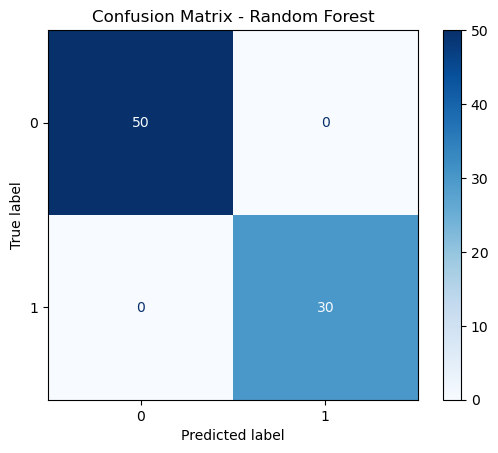

In [ ]:
# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# cv_scores = cross_val_score(rf, X_train_final, y_train_final, cv=kfold, scoring='accuracy')
# print(f"K-Fold Cross-Validation Scores: {cv_scores}")
# print(f"Mean Accuracy: {cv_scores.mean():.4f}")

In [ ]:
# cv_scores = cross_val_predict(rf, X_train_final, y_train_final, cv=kfold)
# print(f"K-Fold Cross-Validation predict: {cv_scores}")
# print(f"Mean Accuracy: {cv_scores.mean():.4f}")

In [ ]:
# rf.fit(X_train_final, y_train_final)

In [ ]:
# y_pred = rf.predict(X_test_scaled)
# print("Confusion Matrix:\n", confusion_matrix(y_test, cv_scores))
# print("\nClassification Report:\n", classification_report(y_test, cv_scores))

In [ ]:
# conf_matrix = confusion_matrix(y_train_final, cv_scores)

In [ ]:
# y_pred = rf.predict(X_test_scaled)
# print("Confusion Matrix:\n", confusion_matrix(y_test, cv_scores))
# print("\nClassification Report:\n", classification_report(y_test, cv_scores))

In [ ]:
# print("Confusion Matrix dari K-Fold Cross Validation:")
# print(conf_matrix)

# print("\nClassification Report:")
# print(classification_report(y_train_final, cv_scores))

In [ ]:
# print("Distribusi setelah SMOTE:", dict(Counter(y_train_resampled)))

In [ ]:
#rf = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# print("normal data distribution: {}".format(Counter(y)))
# X_smote, y_smote = SMOTE().fit_sample(X, y)
# print("SMOTE data distribution: {}".format(Counter(y_smote)))

In [ ]:
# print("Normal data distribution: ")
# print('Shape dari X: {}'.format(X.shape))
# print('Shape dari y: {}'.format(y.shape))

In [ ]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

In [ ]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X, y.ravel())
# #.ravel()

# print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled==0)))

In [ ]:
# y_train_resampled_series = pd.Series(y_train_resampled)

In [ ]:
# y_train_resampled_series.value_counts()

In [ ]:
# ax = y_train_resampled_series.value_counts().plot.pie(autopct='%.1f%%')
# ax.set_title("Over-sampling")

In [ ]:
# print("Normal data distribution: ")
# print('Shape dari X: {}'.format(X.shape))
# print('Shape dari y: {}'.format(y.shape))

In [ ]:
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# outlier_mask = lof.fit_predict(X_train_resampled) # LOF memberikan label -1 untuk outlier

In [ ]:
# X_cleand = X_train_resampled[outlier_mask == 1]
# y_cleand = y_train_resampled_series[outlier_mask == 1]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_cleand, y_cleand, random_state=42, test_size=0.20)

In [ ]:
# def print_results(headline, true_value, pred):
#     print(headline)
#     print("accuracy: {}".format(accuracy_score(true_value, pred)))
#     print("precision: {}".format(precision_score(true_value, pred)))
#     print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, bebeta=2)))

In [ ]:
# smote_pipeline = make_pipeline(SMOTE(random_state=4), classifier(random_state=42))

In [ ]:
# smote_model = smote_pipeline.fit(X_train, y_train)
# smote_prediction = smote_model.predict(X_test)

In [ ]:
# param_grid = {"max_depth": [3,5, None],
#               "n_estimators":[3,5,10],
#               "max_features": [5,6,7,8]}

# model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
# grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [ ]:
# rf = RandomForestClassifier(max_depth=3, max_features = 6, n_estimators = 3)
# rf.fit(X_train, y_train)

In [ ]:
# print("Training score data: ")
# print(rf.score(X_train, y_train))

In [ ]:
# y_pred = rf.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print("RF classification",classification_report(y_test, y_pred))

In [ ]:
# features = ['Age','Blood Pressure','Specific Gravity','Albumin','Sugar','Red Blood Cells','Pus Cell',
#                 'Pus Cell Clumps','Bacteria','Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium',
#                 'Potassium','Haemoglobin','Packed Cell Volume','White Blood Cell Count','Red Blood Cell Count',
#                 'Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Peda Edema','Anemia']

# plt.figure(figsize = (9,5))

# feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
# feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

# g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
# g.set_title('Features importance - Random Forest',fontsize=20)
# plt.show() 

In [ ]:
# y_predict = rf.predict(X_test)

# print("Akurasi:", classification_report(y_test, y_predict))

In [ ]:
# scores = cross_val_score(rf, X_train, y_train, cv=5)
# print("Akurasi Cross Validation:",scores)

#### 4. Transformasi Data 

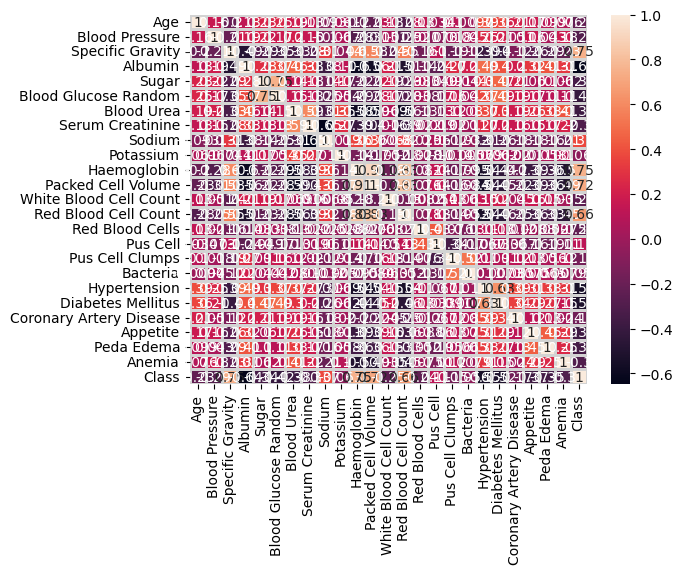

In [ ]:
# # heatmap of data

# plt.figure(figsize = (25, 10))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

## **DATA PREPARATION**

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>DATA PREPARATION</strong></p> 

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [ ]:
# models = pd.DataFrame({
#     'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
#              'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
#     'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
# })


# models.sort_values(by = 'Score', ascending = False)

In [ ]:
# px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
#        title = 'Models Comparison')